In [1]:
from qutip import*
import numpy as np
import matplotlib.pyplot as plt
from math import*
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
alpha=0.5*np.pi
N=20
No=1/(np.sqrt(2*(1+np.exp(-((np.pi)**2)/4))))
phi_expected=No*(coherent(N,alpha)+coherent(N,-alpha))
rho1=ket2dm(phi_expected)

ec=1.6e-19
h=(6.62e-34)/2*np.pi
w_c=2*np.pi*1.5*ec/(6.62e-34)
w_a=2*np.pi*1.5*ec/(6.62e-34)
w_p=2*np.pi*1.5*ec/(6.62e-34)
g=(0.1*2*np.pi*(ec*1e-3)/(6.62e-34))
kappa=0.0085e-12/h
gamma=0.001e-12/h
alpha=0.5*np.pi
t_drive=np.array([0.1e-12,1.42e-11,2.41e-11,3.46e-11,4e-11,4.65e-11,5.37e-11,6.07e-11,6.72e-11,7.21e-11])
#print(t_drive)
sig=1e-13/2.355 
#print(sig)
tlist=[]

t=0.0

while t<=80:
    #o=round(t,)
    o=round(t,2)
    o=o*(1e-12)
    tlist.append(float("%.14f"%o))
    t=t+0.1
tlist=np.array(tlist)

In [3]:
output1=qload('project-1-part-1')

In [4]:
result1=qload('project-1-part-1 wigner dissipation')

In [5]:
fida_d=result1.states
#print(fida)
fida1_d=[]
for i in range(0,len(tlist)):
    g=ptrace(fida_d[i],0)

    fidelity1=fidelity(rho1,g)
    fida1_d.append(fidelity1)

In [6]:
def d_drive(tlist,args):
  
    f=0  
    s=0
    p=0
   
    if tlist<=((t_drive[0]+t_drive[1])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[0])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[0]))
        
        
    if tlist<=((t_drive[1]+t_drive[2])/2) and tlist>((t_drive[0]+t_drive[1])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[1])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[1]))
        
        
        
    if tlist<=((t_drive[2]+t_drive[3])/2) and tlist>((t_drive[1]+t_drive[2])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[2])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[2]))
        
        
    if tlist<=((t_drive[3]+t_drive[4])/2) and tlist>((t_drive[2]+t_drive[3])/2):
        f=(((np.pi*np.exp(-(tlist-t_drive[3])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[3]))
        
        
    if tlist<=((t_drive[4]+t_drive[5])/2) and tlist>((t_drive[3]+t_drive[4])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[4])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[4]))
        
    if tlist<=((t_drive[5]+t_drive[6])/2) and tlist>((t_drive[4]+t_drive[5])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[5])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[5]))
        
        
    if tlist<=((t_drive[6]+t_drive[7])/2) and tlist>((t_drive[5]+t_drive[6])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[6])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[6]))
        
        
    if tlist<=((t_drive[7]+t_drive[8])/2) and tlist>((t_drive[6]+t_drive[7])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[7])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[7]))

        
    if tlist<=((t_drive[8]+t_drive[9])/2) and tlist>((t_drive[7]+t_drive[8])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[8])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[8]))
      
        
    if tlist>=((t_drive[8]+t_drive[9])/2):
        f=-(((np.pi*np.exp(-(tlist-t_drive[9])**2/(2*sig**2)))/(np.sqrt(2*np.pi)*sig)))*np.exp(-w_p*1j*(tlist-t_drive[9]))
  
        
    #print(s)
    return f
o=[]
for i in range(0,len(tlist)):
    g=d_drive(tlist[i],0)
    o.append(g.real)

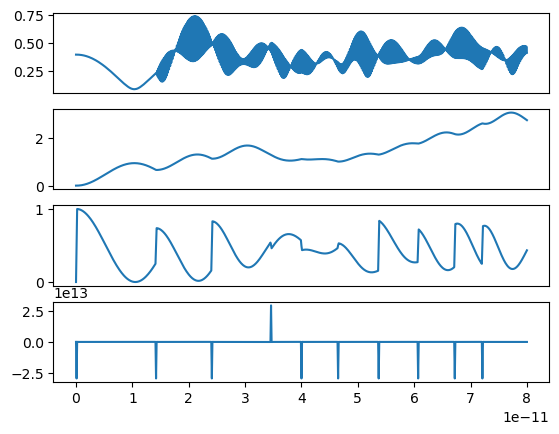

In [7]:
fig=plt.figure()
n_c_d=output1.expect[0]
n_a_d=output1.expect[1]
axes=fig.add_subplot(412)
line_c=axes.plot(tlist,n_c_d,label='cavity ')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(413)
line_a=axes.plot(tlist,n_a_d,label='dot excited state')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(411)
line_c=axes.plot(tlist,fida1_d,'')
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(414)
line_c=axes.plot(tlist,o)
plt.show()

In [8]:
import scipy as sc
from scipy.optimize import leastsq
tou1=3.46e-11
def funcquad(t,a,f,tau):
    return a*np.exp(t/tau)*np.cos(2*np.pi*f*t)
def residual(p,y,t):
    a,f,tau=p
    return y-funcquad(t,a,f,tau)
P0=1,w_c,tou1
P,_=leastsq(residual,P0,args=(fida1_d,tlist))
print(P)
Y=funcquad(tlist,*P)

ggM_d=[]
U=0   
while U<10:
    ggM_d.append(fida1_d[U])
    U=U+1

for i in range(10,len(tlist)):
    gg=(fida1_d[i-5]+fida1_d[i-4]+fida1_d[i-3]+fida1_d[i-2]+fida1_d[i-1]+fida1_d[i])/6
    ggM_d.append(gg)
print(len(tlist),len(ggM_d)) 

[-3.43537169e-06  2.27789184e+15  9.71560904e-12]
801 801


[]

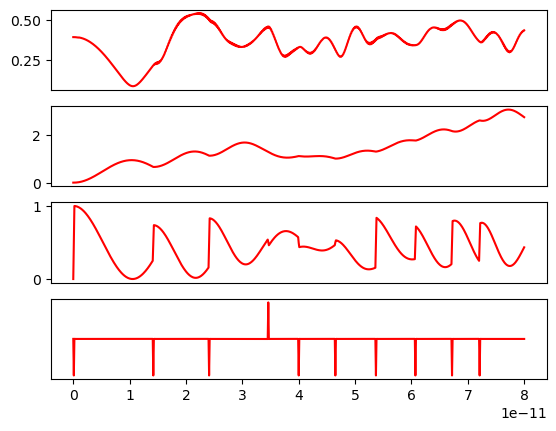

In [9]:
fig=plt.figure()
n_c_d=output1.expect[0]
n_a_d=output1.expect[1]
axes=fig.add_subplot(412)
line_c=axes.plot(tlist,n_c_d,label='cavity ',color="red")
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
#axes.set_axis_off()

axes=fig.add_subplot(413)
line_a=axes.plot(tlist,n_a_d,label='dot excited state',color="red")
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(411)
line_c=axes.plot(tlist,ggM_d,color="red")
axes.get_xaxis().set_ticks([])
axes.get_xaxis().set_ticklabels([])
axes=fig.add_subplot(414)
line_c=axes.plot(tlist,o,"",color="red")
axes.get_yaxis().set_ticks([])
axes.get_yaxis().set_ticklabels([])
#axes.spines['bottom'].set_visible(False)
#plt.savefig('1_1_dissipation_plot.png', dpi=500)

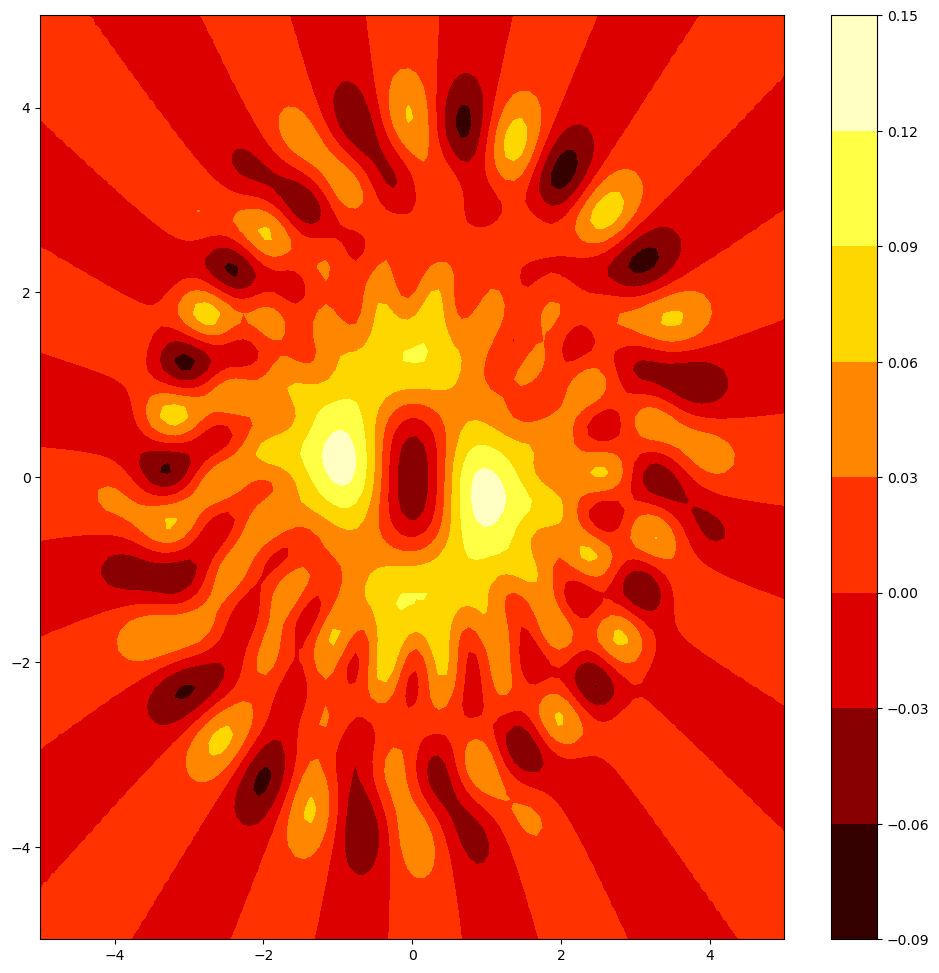

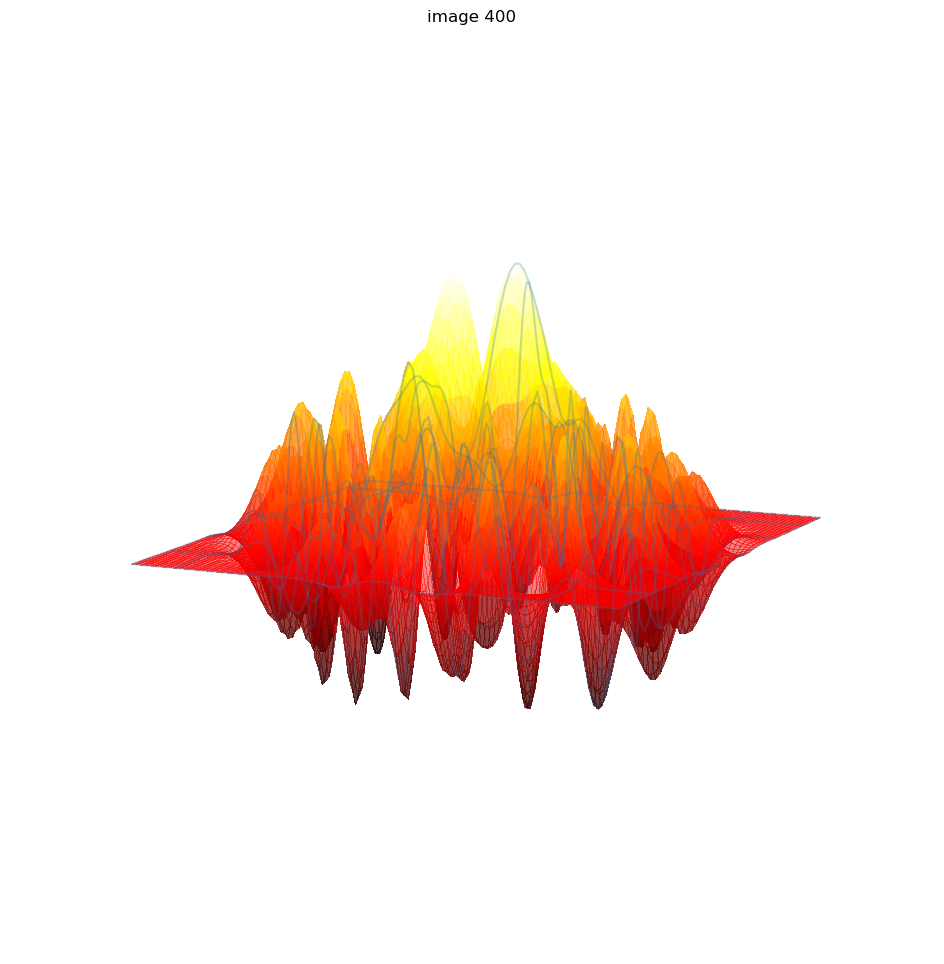

In [12]:
def wigner_plot_steadystate(rho,xvec,i):
    
    rho_cavity=ptrace(rho,0)
    W=wigner(rho_cavity,xvec,xvec)
    wlim=abs(W).max()
    fig=plt.figure(figsize=(12,12),facecolor='none')
    axes1=fig.add_subplot(111)
    plot1=axes1.contourf(xvec,xvec,W,cmap=cm.hot)
    plt.colorbar(plot1)
    xvec=np.linspace(-2,2,100)
    X,Y=np.meshgrid(xvec,xvec)
    plt.savefig(f"1_1_dissipation_wig_contour{i}.png", dpi=1200)
    fig1=plt.figure(figsize=(12,12),facecolor='none')
    axes1=fig1.add_subplot(111,projection='3d')
    
    dia=axes1.plot_surface(X,Y,W,rstride=1,cstride=1,antialiased=False,cmap='hot',alpha=0.50)
    dia=axes1.plot_wireframe(X,Y,W,rstride=15,cstride=15,antialiased=True,cmap='hot',alpha=.25)
    
    axes1.view_init(10,205)
    plt.title(f"image {i}")
    axes1.set_xlabel(r"Im $\alpha$")
    axes1.set_ylabel(r"Re $\alpha$")
    axes1.axis('off')
    plt.savefig(f"1_1_dissipation_wig_3D{i}.png", dpi=1200)
    #axes2=fig.add_subplot(1,2,2)
    #plot1=axes2.bar(np.arange(N),np.real(rho_cavity.diag()))
    #axes2.set_xlabel('Fock number')
    #axes2.set_ylabel("Occupation probability")
    
xvec=np.linspace(-5,5,100)
X,Y=np.meshgrid(xvec,xvec)

for i in range(400,401,1):
    
    wigner_plot_steadystate(result1.states[i],xvec,i)
